# Basic classification: Classify images of clothing

In [1]:
# Import the libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [2]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
# Class names are not included in the dataset, so
# we are going to define them here:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
print(f"Sample train image shape: {train_images[:1].shape}")  # 28x28 pixels
print(f"Sample train label index: {train_labels[0]}")  # 9 == ankle boot
print(f"Sample train label: {class_names[train_labels[0]]}")

Sample train image shape: (1, 28, 28)
Sample train label index: 9
Sample train label: Ankle boot


## Explore the dataset

In [7]:
# We've got 60k images of 28x28 pixels
train_images.shape

(60000, 28, 28)

In [9]:
# Likewise, we've got 60k labels in the training set
len(train_labels)

60000

In [10]:
# Each label is an integer between 0 and 9
print(f"Sample 0 label: {train_labels[0]}")
print(f"Sample 1 label: {train_labels[1]}")

Sample 0 label: 9
Sample 1 label: 0


In [11]:
# Test set is similar. 
# We've got 10k images for testing our model.
test_images.shape

(10000, 28, 28)

In [12]:
# As well as 10k labels
len(test_labels)

10000

## Data preprocessing

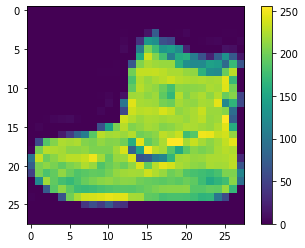

In [13]:
# Let's visualize the first train image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
# Since the pixel values come from 0 to 255, we are
# going to scale them
train_images = train_images / 255.0

In [15]:
# We have to scale the test set too
test_images = test_images / 255.0

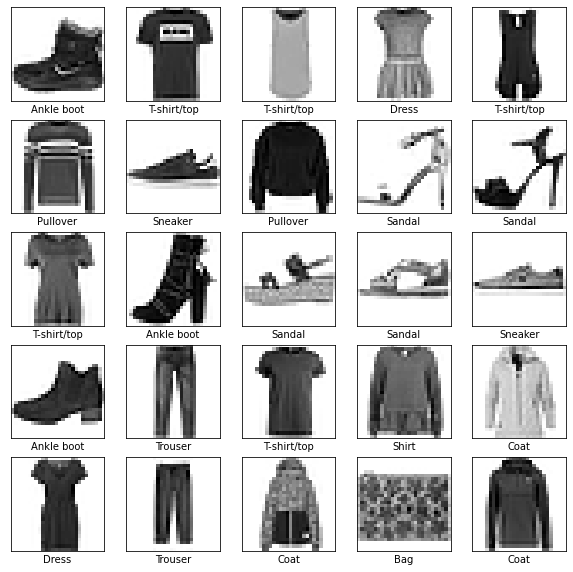

In [16]:
# To verify the data is in the correct format, 
# let's display the first 25 images on the
# training set with their class names

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

In [17]:
# Let's set up the model layers
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),  # unstacks rows of pixels and line them up
  tf.keras.layers.Dense(128, activation="relu"),  # fully connected layers
  tf.keras.layers.Dense(10)  # returns the score for each label
])

In [18]:
# Let's define the loss function, the optimizer and 
# the metrics and compile the model
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"]
              )

## Train the model

In [19]:
# Train the model for 10 epochs
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5008 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3759 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3372 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3148 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2968 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2702 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2584 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2501 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

## Evaluate the model

In [20]:
# Let's see how the model performs on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 0s - loss: 0.3398 - accuracy: 0.8777 - 467ms/epoch - 1ms/step
Test accuracy: 0.8776999711990356


The accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting.

## Make predictions

In [21]:
# Before making predictions with the trained model,
# let's attach a softmax after the last layer to 
# get probabilities instead of logits.
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [22]:
# Let's get the predictions for the complete test set
predictions = probability_model.predict(test_images)

In [24]:
# We can inspect the prediction for the first sample
print(f"Probabilities: {predictions[0]}")
print(len(predictions[0]))

Probabilities: [3.36380958e-06 1.94231076e-09 1.73932024e-09 1.01182666e-10
 1.88799632e-07 1.49472523e-03 3.88544976e-07 2.14208812e-02
 1.64050050e-06 9.77078855e-01]
10


In [25]:
# Let's get the label that has the highest confidence
np.argmax(predictions[0])

9

In [26]:
# Let's inspect the correct label as well
test_labels[0]

9

In [38]:
# Let's create a function for visualizing the image,
# the predictions and the true label

def plot_image(i: int, 
               predictions_array: np.ndarray, 
               true_label: np.ndarray, 
               img: np.ndarray
               ) -> None:
  
  # Get the true label and image
  true_label, img = true_label[i], img[i]
  
  # Plot the image
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  # Compare the prediction with the true label
  predicted_label = np.argmax(predictions_array)
  predicted_class = class_names[predicted_label]
  confidence = np.max(predictions_array)
  true_class = class_names[true_label]
  color = "blue" if predicted_label == true_label else "red"

  # And plot them
  text = f"Pred = {predicted_class} {round(100*confidence, 2)}% (GT = {true_class})"
  plt.xlabel(text, color=color)



In [41]:
# Let's create another function to plot a bar graph with 
# all the predictions

def plot_value_array(i: int,
                     predictions_array: np.ndarray, 
                     true_label: np.ndarray
                     ) -> None:
  
  # Get the true label
  true_label = true_label[i]

  # Plot all probabilities
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])

  # Set 'red' to the predicted label
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color("red")

  # And 'blue' to the real label
  thisplot[true_label].set_color("blue")

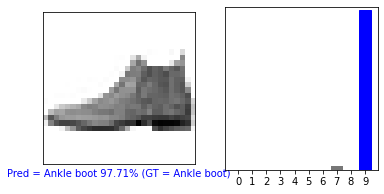

In [42]:
# Now, let's use the functions to see the predictions
# for the image 0
i = 0

plt.figure(figsize=(6,3))

# Plot the image, the prediction and the true label
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)

# Plot all the probabilities and the predicted and
# true labels
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)

plt.show()

The previous prediction is correct.

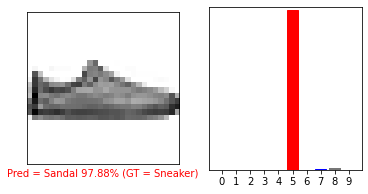

In [43]:
# Let's do the same with the 12th sample
i = 12

plt.figure(figsize=(6,3))

# Plot the image, the prediction and the true label
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)

# Plot all the probabilities and the predicted and
# true labels
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)

plt.show()

However, this prediction is not correct although the model has a high confidence.

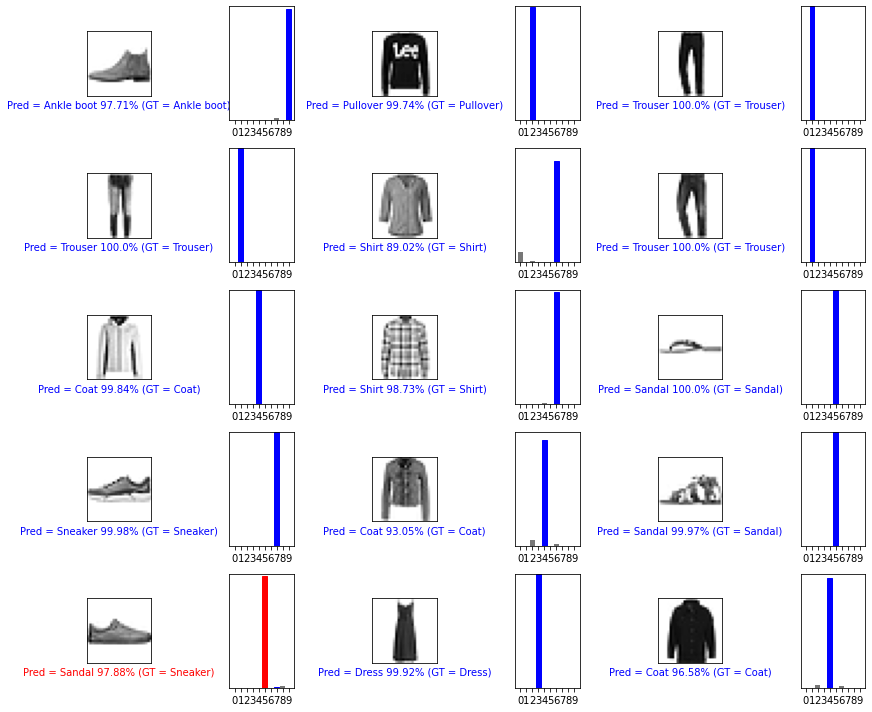

In [44]:
# Let's make the same plots with multiple test images
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

## Use the model

In [56]:
# Let's grab an image from the test set
img = test_images[1]
print(img.shape)

(28, 28)


In [57]:
# Add the image to a batch. In this case, the batch
# size is only 1.
img = (np.expand_dims(img, 0))
print(img.shape)
print(type(img))

(1, 28, 28)
<class 'numpy.ndarray'>


In [59]:
# And now make the predictions
predictions_single = probability_model.predict(img)
print(predictions_single)
print(predictions_single.shape)

[[3.2592794e-05 5.4710610e-14 9.9741471e-01 1.7465206e-09 1.7670916e-03
  2.9366353e-11 7.8559312e-04 4.7567634e-16 5.7521490e-09 1.4757994e-15]]
(1, 10)


In [64]:
# Let's see the prediction for the only one image
# in the batch
predicted_label = np.argmax(predictions_single[0])
print(f"Predicted class: {class_names[predicted_label]}")

Predicted class: Pullover


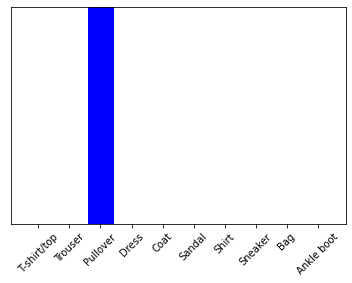

In [65]:
# Again, we can visualize the predictions
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()